In [4]:
import numpy as np
import matplotlib.pyplot as plt

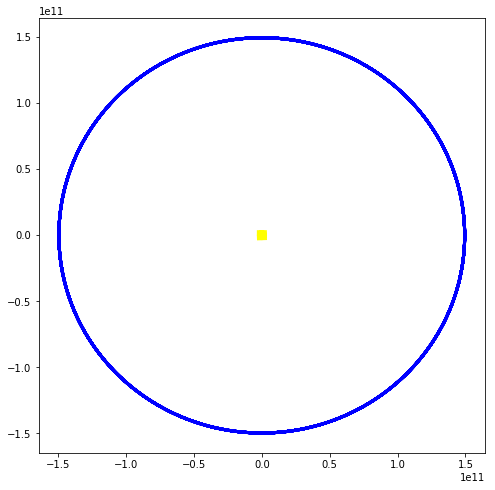

In [38]:
day = 60*60*24
# Constants
G = 6.67408e-11
au = 1.496e11

class CelBody(object):
    # Constants of nature
    # Universal constant of gravitation
    def __init__(self, id, name, x0, v0, mass, color, lw):
        # Name of the body (string)
        self.id = id
        self.name = name
        # Mass of the body (kg)
        self.Mass = mass
        # Initial position of the body (au)
        self.x0 = np.asarray(x0, dtype=float)
        # Position (au). Set to initial value.
        self.x = self.x0.copy()
        # Initial velocity of the body (au/s)
        self.v0 = np.asarray(v0, dtype=float)
        # Velocity (au/s). Set to initial value.
        self.velocity = self.v0.copy()
        self.acceleration = np.zeros([3], dtype=float)
        self.color = color
        self.lw = lw

# All Celestial Bodies

t = 0
dt = 0.1*day

Bodies = [
    CelBody(0, 'Sun', [0, 0, 0], [0, 0, 0], 1.989e30, 'yellow', 10),
    CelBody(1, 'Earth', [-1*au, 0, 0], [0, 29783, 0], 5.9742e24, 'blue', 3),
    ]

paths = [ [ b.x[:2].copy() ] for b in Bodies]

# loop over twenty astronomical years
v = 0
while t < 20*365.242*day:
    # compute forces/accelerations
    for body in Bodies:
        body.acceleration *= 0
        for other in Bodies:
            # no force on itself
            if (body == other): continue # jump to next loop
            rx = body.x - other.x
            r3 = sum(rx**2)**1.5
            body.acceleration += -G*other.Mass*rx/r3

    for n, planet in enumerate(Bodies):
        # use the symplectic Euler method for better conservation of the constants of motion
        planet.velocity += planet.acceleration*dt
        planet.x += planet.velocity*dt
        paths[n].append( planet.x[:2].copy() )
        if t > v:
            v += 30.5*day
        t += dt

plt.figure(figsize=(8,8))
for n, planet in enumerate(Bodies): 
    px, py=np.array(paths[n]).T; 
    plt.plot(px, py, color=planet.color, lw=planet.lw)
plt.show()